<a href="https://colab.research.google.com/github/clovestad/Solar-Plant-Efficiency/blob/main/Plant_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Output of solar energy
1. Source of data
  - https://www.kaggle.com/datasets/anikannal/solar-power-generation-data
2. Brief description of data
  - This data has been gathered at two solar power plants in India over a 34 day period. It has two pairs of files - each pair has one power generation dataset and one sensor readings dataset. The power generation datasets are gathered at the inverter level - each inverter has multiple lines of solar panels attached to it. The sensor data is gathered at a plant level - single array of sensors optimally placed at the plant.

3. What is the target?
  - daily yeild of power and the difference in efficiency between inverters on a daily and monthly period.

4. What does one row represent?
  - a solar inverter to invert DC power to AC power

5. Is this a classification or regression problem?
  - regression

6. How many features does the data have?
  - 7

7. How many rows are in the dataset?
  - 68778



### Task
- Deleted unnecessary columns.
- Deleted duplicate rows.
- Identified and addressed missing values.
- Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
- Produced univariate visuals for the target and all features.
- Identified outliers.
- Clearly commented all of your cleaning steps and described any decisions you made.

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
fpath= '/content/drive/MyDrive/StudentFolders16wk20wk/CodingDojo/02-MachineLearning/Week07/Data/Plant_1_Generation_Data.csv'
df=pd.read_csv(fpath)
df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


-  PLANT_ID do not present  as necessary to obtain yeild power production values.

In [90]:
df=df.drop(columns = ['PLANT_ID'])
df.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


- Check for duplicates

In [91]:
df.duplicated().sum()

0

In [92]:
duplicated_rows = df.duplicated(keep=False)
df[duplicated_rows]

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD


- there are 22 unique inverters inverting power recoded at increments of 15 minutes so the massive amout of duplicates is warranted

In [93]:
df.select_dtypes('object').nunique()

DATE_TIME     3158
SOURCE_KEY      22
dtype: int64

In [94]:
df.select_dtypes('float').nunique()

DC_POWER       32909
AC_POWER       32686
DAILY_YIELD    29900
TOTAL_YIELD    37267
dtype: int64

In [95]:
for col in df:
  print(f'Value counts for {col}:')
  print(df[col].value_counts())
  print('\n')

Value counts for DATE_TIME:
01-06-2020 12:45    22
07-06-2020 00:00    22
07-06-2020 00:30    22
07-06-2020 00:45    22
07-06-2020 01:00    22
                    ..
06-06-2020 18:15    10
04-06-2020 18:45    10
29-05-2020 19:00    10
25-05-2020 05:30     4
03-06-2020 14:00     4
Name: DATE_TIME, Length: 3158, dtype: int64


Value counts for SOURCE_KEY:
bvBOhCH3iADSZry    3155
1BY6WEcLGh8j5v7    3154
7JYdWkrLSPkdwr4    3133
VHMLBKoKgIrUVDU    3133
ZnxXDlPa8U1GXgE    3130
ih0vzX44oOqAx2f    3130
z9Y9gH1T5YWrNuG    3126
wCURE6d3bPkepu2    3126
uHbuxQJl8lW7ozc    3125
pkci93gMrogZuBj    3125
iCRJl6heRkivqQ3    3125
rGa61gmuvPhdLxV    3124
sjndEbLyjtCKgGv    3124
McdE0feGgRqW7Ca    3124
zVJPv84UY57bAof    3124
ZoEaEvLYb1n2sOq    3123
1IF53ai7Xc0U56Y    3119
adLQvlD726eNBSB    3119
zBIq5rxdHJRwDNY    3119
WRmjgnKYAwPKWDb    3118
3PZuoBAID5Wc2HD    3118
YxYtjZvoooNbGkE    3104
Name: SOURCE_KEY, dtype: int64


Value counts for DC_POWER:
0.000000       31951
66.000000          7
26.000000     

In [96]:
for col in df:
  print(f'nulls for {col}:')
  print(df[col].isna().sum())
  print('\n')

nulls for DATE_TIME:
0


nulls for SOURCE_KEY:
0


nulls for DC_POWER:
0


nulls for AC_POWER:
0


nulls for DAILY_YIELD:
0


nulls for TOTAL_YIELD:
0




Feature engineering on Date col

In [97]:
df['DATE_TIME']=pd.to_datetime(df['DATE_TIME'])

df['hour'] = df['DATE_TIME'].dt.hour


df=df.drop(columns = ['DATE_TIME'])
df.head()

,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,hour
0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0
1,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,0
2,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,0
3,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,0
4,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,0


- rename inverters to easily identify during modeling

In [98]:
df['SOURCE_KEY']= df['SOURCE_KEY'].replace({'bvBOhCH3iADSZry':1,
                                            '1BY6WEcLGh8j5v7':2,
                                            '7JYdWkrLSPkdwr4':3,
                                            'VHMLBKoKgIrUVDU':4,
                                            'ZnxXDlPa8U1GXgE':5,
                                            'ih0vzX44oOqAx2f':6,
                                            'z9Y9gH1T5YWrNuG':7,
                                            'wCURE6d3bPkepu2':8,
                                            'uHbuxQJl8lW7ozc':9,
                                            'pkci93gMrogZuBj':10,
                                            'iCRJl6heRkivqQ3':11,
                                            'rGa61gmuvPhdLxV':12,
                                            'sjndEbLyjtCKgGv':13,
                                            'McdE0feGgRqW7Ca':14,
                                            'zVJPv84UY57bAof':15,
                                            'ZoEaEvLYb1n2sOq':16,
                                            '1IF53ai7Xc0U56Y':17,
                                            'adLQvlD726eNBSB':18,
                                            'zBIq5rxdHJRwDNY':19,
                                            'WRmjgnKYAwPKWDb':20,
                                            '3PZuoBAID5Wc2HD':21,
                                            'YxYtjZvoooNbGkE':22})

In [99]:
df = df.set_index('SOURCE_KEY')


In [100]:
df.head()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,hour
SOURCE_KEY,,,,,
2,0.0,0.0,0.0,6259559.0,0
17,0.0,0.0,0.0,6183645.0,0
21,0.0,0.0,0.0,6987759.0,0
3,0.0,0.0,0.0,7602960.0,0
14,0.0,0.0,0.0,7158964.0,0


## visuals

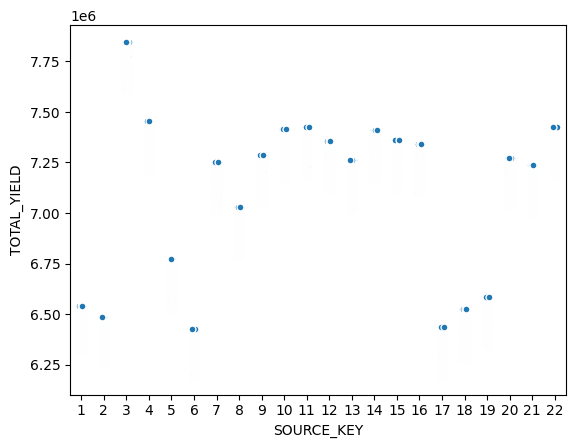

In [101]:
import seaborn as sns
ax = sns.stripplot(data=df, x='SOURCE_KEY', y='TOTAL_YIELD', edgecolor='white', linewidth=1)

- High cardinality of value source key expected as they represent the 22 individual units generating power to compare statistics to one another.
- visualization  shows no difinitive correlation  up or down but  a median floating around 7.25KW total yield.

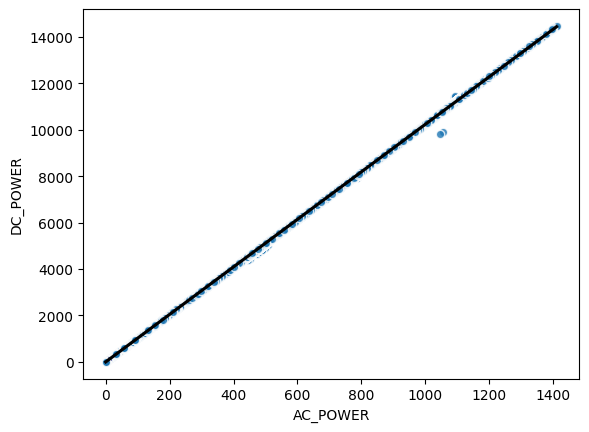

In [102]:
line_kws = dict(color='black')
scatter_kws = dict(edgecolor='white')
ax = sns.regplot(data=df, x='AC_POWER', y="DC_POWER",
                 line_kws=line_kws, scatter_kws=scatter_kws);

- visualization depicts the correlation of AC_power to DC_power  at a factor of DC = 10 x AC with only a few outliers defying the trend line.

- obtain correlations to continue data exploration.

In [103]:
corr = df.corr()
corr.round(2)

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,hour
DC_POWER,1.00,1.00,0.08,0.00,0.02
AC_POWER,1.00,1.00,0.08,0.00,0.02
DAILY_YIELD,0.08,0.08,1.00,0.01,0.84
TOTAL_YIELD,0.00,0.00,0.01,1.00,0.00
hour,0.02,0.02,0.84,0.00,1.00


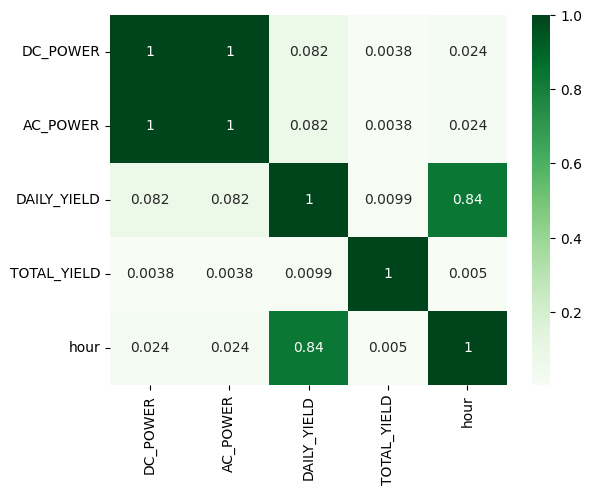

In [104]:
sns.heatmap(corr, cmap = 'Greens', annot = True);

- Presentation Visuals

Text(0.5, 0, 'Inverter Number')

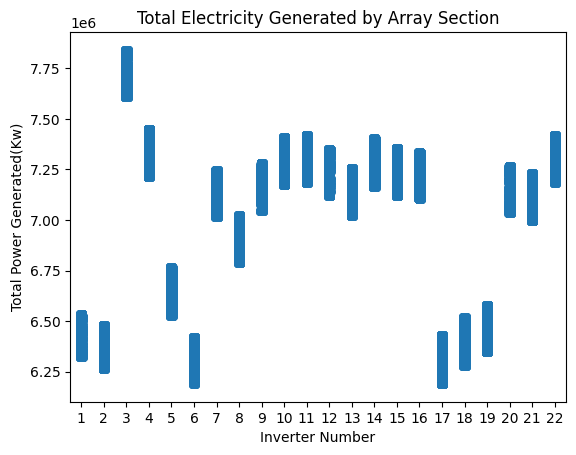

In [105]:
ax = sns.stripplot(data=df, x='SOURCE_KEY', y='TOTAL_YIELD',  )
ax.set_title('Total Electricity Generated by Array Section')
ax.set_ylabel('Total Power Generated(Kw)')
ax.set_xlabel('Inverter Number')

- the above plot relates a majority of the inverters maintaining and steady output of 7.25Kw on a montly total output with a few inverters indicating inefficiencies that COULD effect overall plant performance/generation and should be noted for maintnience or replacement.

<ipython-input-106-667ed158ea94>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(data=df, x='SOURCE_KEY', y='DAILY_YIELD',palette="deep")


Text(0.5, 0, 'Inverter Number')

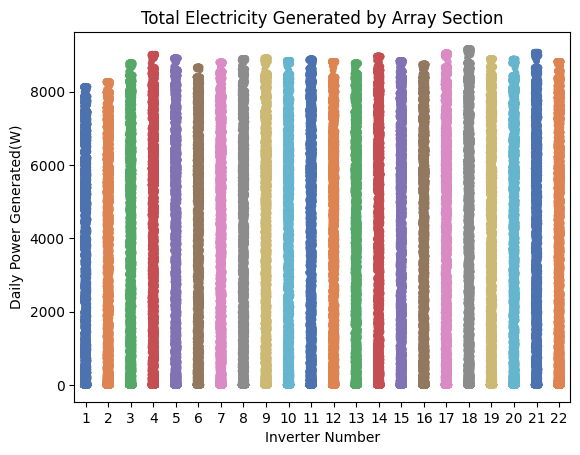

In [106]:
ax = sns.stripplot(data=df, x='SOURCE_KEY', y='DAILY_YIELD',palette="deep")
ax.set_title('Total Electricity Generated by Array Section')
ax.set_ylabel('Daily Power Generated(W)')
ax.set_xlabel('Inverter Number')

- Daily power generation indicates a more even disrtribution of generation between inverters ,returning the indication in the previous visualization that the lower producing inverters  were not perfroming efficiently as false(minimal amount of downtime is permissable for maintnience/updates).

In [107]:
df.head()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,hour
SOURCE_KEY,,,,,
2,0.0,0.0,0.0,6259559.0,0
17,0.0,0.0,0.0,6183645.0,0
21,0.0,0.0,0.0,6987759.0,0
3,0.0,0.0,0.0,7602960.0,0
14,0.0,0.0,0.0,7158964.0,0


Text(0.5, 0, ' Time of  day')

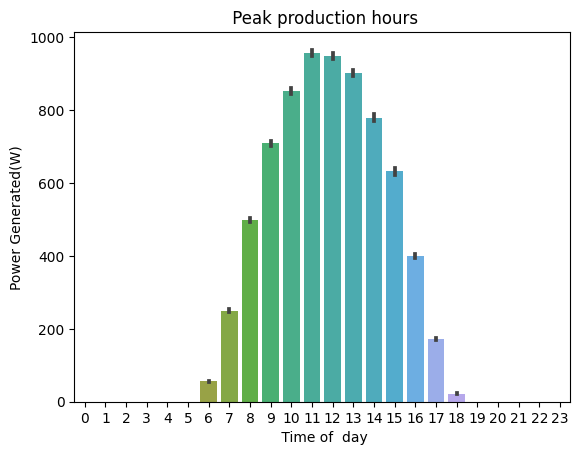

In [108]:
ax = sns.barplot(data=df, x='hour', y='AC_POWER')
ax.set_title(' Peak production hours')
ax.set_ylabel('Power Generated(W)')
ax.set_xlabel(' Time of  day')

- the above table relates that the peak production hours are undoubtably in the midle of the day, while the sun is at its highest point.

#Modeling

## Regression Tree

In [116]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

In [110]:
#testtrainsplit
X = df.drop(columns = ['TOTAL_YIELD'])
y=df['TOTAL_YIELD']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [111]:
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)

Numeric Columns: Index(['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'hour'], dtype='object')


In [112]:
col_transformer = ColumnTransformer([num_tuple],
                                    verbose_feature_names_out=False)
# Fit on training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'hour'], dtype='object'))],
                  verbose_feature_names_out=False)

In [113]:
# Transform the training data
X_train_tf = col_transformer.transform(X_train)
# Transform the testing data
X_test_tf = col_transformer.transform(X_test)
# View the processed training data
X_train_tf.head()

,DC_POWER,AC_POWER,DAILY_YIELD,hour
SOURCE_KEY,,,,
17,-0.760228,-0.761168,0.964448,0.942369
3,-0.779213,-0.779902,1.587705,1.379534
2,-0.266736,-0.265699,0.182283,0.650926
3,1.767549,1.766089,0.082636,-0.077682
3,-0.779213,-0.779902,1.419521,1.379534


In [114]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)


In [117]:
# Instantiate a default model with random state for reproducibility
model = DecisionTreeRegressor(random_state = 42)
# Fit the default model on the training data
model.fit(X_train_tf, y_train)
# Use custom function to predict and evaluate
evaluate_regression(model, X_train_tf, y_train, X_test_tf, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 104,768.217
- MSE = 49,484,038,624.029
- RMSE = 222,450.081
- R^2 = 0.715

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 343,264.067
- MSE = 229,047,716,575.625
- RMSE = 478,589.298
- R^2 = -0.323


R2 has noteably gone Down

## GridsearchCV

In [118]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [121]:
# Create the Column Transformer
preprocessor = ColumnTransformer([num_tuple],
                                     verbose_feature_names_out=False)

In [122]:
#instanciate pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)

In [123]:
# fit model
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'hour'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [124]:
# Make predictions and evalute with custom function with no params set
evaluate_regression(dec_tree_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 104,768.217
- MSE = 49,484,038,624.029
- RMSE = 222,450.081
- R^2 = 0.715

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 343,264.067
- MSE = 229,047,716,575.625
- RMSE = 478,589.298
- R^2 = -0.323


In [125]:
# Looking at options for tuning this model
dec_tree_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'hour'], dtype='object'))],
                     verbose_feature_names_out=False)),
  ('decisiontreeregressor', DecisionTreeRegressor(random_state=42))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('numeric',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('standardscaler',
                                                   Stand

In [126]:
param_grid = {'decisiontreeregressor__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
              'decisiontreeregressor__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'decisiontreeregressor__min_samples_split': [2, 3, 4]}

In [127]:
# Instantiate GridSearchCV
grid_search = GridSearchCV(dec_tree_pipe, param_grid, n_jobs = -1, verbose = 1)

In [128]:
# Fit the Gridsearch on the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 330 candidates, totalling 1650 fits


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'hour'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'decisiontreeregressor__max_depth': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10,
                                                              None],
                         'decisiontreeregressor__min_samples_leaf': [1, 2, 3, 4,
                                                                     5, 6, 7, 8,
                                                                     9, 10],
                         'decisiontreeregressor__min_samples_split': [2, 3, 4]},
             verbose=1)

In [129]:
# Obtain the best combination directly
grid_search.best_params_

{'decisiontreeregressor__max_depth': None,
 'decisiontreeregressor__min_samples_leaf': 10,
 'decisiontreeregressor__min_samples_split': 2}

In [130]:
# Now define the best version of the model
best_model = grid_search.best_estimator_

In [131]:
# Predict and Evaluate with custom function
evaluate_regression(best_model, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 261,136.088
- MSE = 118,095,832,742.426
- RMSE = 343,650.742
- R^2 = 0.319

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 306,693.372
- MSE = 161,417,888,448.066
- RMSE = 401,768.451
- R^2 = 0.067


- Kmeans

- imports

In [ ]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)

In [ ]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

- Reccomended clusters via inertia score- 3